In [51]:
# Import the libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# Read in the data
df = pd.read_csv('Merged_data_sample.xlsx - Sheet1.csv') 
df.head()

,dim_calendar_sk,dim_destination_country_sk,obd_number,tour_number,cts_cost,business_unit,customer_code,country_code,Supply_Level_1,Supply_Level_2,shto_name,transportation_comp_name,cts_cost_subtype1,cts_cost_subtype2,PROD_SKU,postal_code,Full_Date,Year,Month_No,Week_No
0,20210115,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149969,90765,2021-01-15,2021,1,3
1,20210115,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149970,90765,2021-01-15,2021,1,3
2,20210115,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,8113722,90765,2021-01-15,2021,1,3
3,20210617,9,8005645111,433631,0,Health,921259,DE,GROWTH CHANNELS,SEX-TRADE/ PVS,B&C Sales BV,Raben Trans,Despatch Costs,Case Pick,8160619,3627,2021-06-17,2021,6,25
4,20210511,9,8005448305,429589,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3141293,90765,2021-05-11,2021,5,20


In [5]:
df.describe()

,dim_calendar_sk,dim_destination_country_sk,obd_number,tour_number,cts_cost,customer_code,PROD_SKU,postal_code,Year,Month_No,Week_No
count,7.000000e+00,7.0,7.000000e+00,7.000000,7.0,7.000000,7.000000e+00,7.000000,7.0,7.000000,7.000000
mean,2.021039e+07,9.0,8.005285e+09,425401.142857,0.0,921264.714286,4.879032e+06,65868.428571,2021.0,3.714286,14.714286
std,2.617903e+02,0.0,3.772022e+05,8869.108043,0.0,3.903600,3.219173e+06,42518.990278,0.0,2.627691,11.382945
min,2.021012e+07,9.0,8.004898e+09,416248.000000,0.0,921259.000000,2.770210e+05,3627.000000,2021.0,1.000000,3.000000
25%,2.021012e+07,9.0,8.004898e+09,416248.000000,0.0,921263.000000,3.145631e+06,47196.000000,2021.0,1.000000,3.000000
50%,2.021051e+07,9.0,8.005448e+09,429588.000000,0.0,921267.000000,3.149970e+06,90765.000000,2021.0,5.000000,20.000000
75%,2.021056e+07,9.0,8.005547e+09,431610.000000,0.0,921267.000000,8.137170e+06,90765.000000,2021.0,5.500000,22.500000
max,2.021071e+07,9.0,8.005756e+09,436256.000000,0.0,921267.000000,8.160627e+06,90765.000000,2021.0,7.000000,29.000000


In [ ]:
# listing the null values columns having more than 35%

null_col=df.isnull().sum()
null_col=null_col[null_col.values>(0.35*len(null_col))]
len(null_col)

In [9]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100

dim_calendar_sk               0.0
dim_destination_country_sk    0.0
obd_number                    0.0
tour_number                   0.0
cts_cost                      0.0
business_unit                 0.0
customer_code                 0.0
country_code                  0.0
Supply_Level_1                0.0
Supply_Level_2                0.0
shto_name                     0.0
transportation_comp_name      0.0
cts_cost_subtype1             0.0
cts_cost_subtype2             0.0
PROD_SKU                      0.0
postal_code                   0.0
Full_Date                     0.0
Year                          0.0
Month_No                      0.0
Week_No                       0.0
dtype: float64

In [10]:
df["business_unit"].value_counts() 

Hygine    5
Health    2
Name: business_unit, dtype: int64

In [15]:
df.dtypes

dim_calendar_sk                int64
dim_destination_country_sk     int64
obd_number                     int64
tour_number                    int64
cts_cost                       int64
business_unit                 object
customer_code                  int64
country_code                  object
Supply_Level_1                object
Supply_Level_2                object
shto_name                     object
transportation_comp_name      object
cts_cost_subtype1             object
cts_cost_subtype2             object
PROD_SKU                       int64
postal_code                    int64
Full_Date                     object
Year                           int64
Month_No                       int64
Week_No                        int64
dtype: object

In [16]:
# Checking up with the categorical variables
df["Supply_Level_1"].value_counts() 

OTHER CHANNELS     5
GROWTH CHANNELS    2
Name: Supply_Level_1, dtype: int64

In [17]:
# Checking up with the categorical variables
df["Supply_Level_2"].value_counts() 

CLEARANCE         5
SEX-TRADE/ PVS    2
Name: Supply_Level_2, dtype: int64

In [20]:
#drop the 	dim_calendar_sk as it is of no use, we already have Full_Date coloum
df.drop("dim_calendar_sk", axis=1, inplace=True)
df.head()

,dim_destination_country_sk,obd_number,tour_number,cts_cost,business_unit,customer_code,country_code,Supply_Level_1,Supply_Level_2,shto_name,transportation_comp_name,cts_cost_subtype1,cts_cost_subtype2,PROD_SKU,postal_code,Full_Date,Year,Month_No,Week_No
0,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149969,90765,2021-01-15,2021,1,3
1,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149970,90765,2021-01-15,2021,1,3
2,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,8113722,90765,2021-01-15,2021,1,3
3,9,8005645111,433631,0,Health,921259,DE,GROWTH CHANNELS,SEX-TRADE/ PVS,B&C Sales BV,Raben Trans,Despatch Costs,Case Pick,8160619,3627,2021-06-17,2021,6,25
4,9,8005448305,429589,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3141293,90765,2021-05-11,2021,5,20


In [21]:
df.shape

(7, 19)

In [22]:
# Lets drop year and month coloumns too as we already have full date column
 df.drop("Year", axis=1, inplace=True)
df.head()

,dim_destination_country_sk,obd_number,tour_number,cts_cost,business_unit,customer_code,country_code,Supply_Level_1,Supply_Level_2,shto_name,transportation_comp_name,cts_cost_subtype1,cts_cost_subtype2,PROD_SKU,postal_code,Full_Date,Month_No,Week_No
0,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149969,90765,2021-01-15,1,3
1,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149970,90765,2021-01-15,1,3
2,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,8113722,90765,2021-01-15,1,3
3,9,8005645111,433631,0,Health,921259,DE,GROWTH CHANNELS,SEX-TRADE/ PVS,B&C Sales BV,Raben Trans,Despatch Costs,Case Pick,8160619,3627,2021-06-17,6,25
4,9,8005448305,429589,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3141293,90765,2021-05-11,5,20


In [23]:
df.drop("Month_No", axis=1, inplace=True)
df.head()

,dim_destination_country_sk,obd_number,tour_number,cts_cost,business_unit,customer_code,country_code,Supply_Level_1,Supply_Level_2,shto_name,transportation_comp_name,cts_cost_subtype1,cts_cost_subtype2,PROD_SKU,postal_code,Full_Date,Week_No
0,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149969,90765,2021-01-15,3
1,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149970,90765,2021-01-15,3
2,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,8113722,90765,2021-01-15,3
3,9,8005645111,433631,0,Health,921259,DE,GROWTH CHANNELS,SEX-TRADE/ PVS,B&C Sales BV,Raben Trans,Despatch Costs,Case Pick,8160619,3627,2021-06-17,25
4,9,8005448305,429589,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3141293,90765,2021-05-11,20


In [24]:
df.shape

(7, 17)

In [25]:
df.head()

,dim_destination_country_sk,obd_number,tour_number,cts_cost,business_unit,customer_code,country_code,Supply_Level_1,Supply_Level_2,shto_name,transportation_comp_name,cts_cost_subtype1,cts_cost_subtype2,PROD_SKU,postal_code,Full_Date,Week_No
0,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149969,90765,2021-01-15,3
1,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3149970,90765,2021-01-15,3
2,9,8004898331,416248,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,8113722,90765,2021-01-15,3
3,9,8005645111,433631,0,Health,921259,DE,GROWTH CHANNELS,SEX-TRADE/ PVS,B&C Sales BV,Raben Trans,Despatch Costs,Case Pick,8160619,3627,2021-06-17,25
4,9,8005448305,429589,0,Hygine,921267,DE,OTHER CHANNELS,CLEARANCE,Topbrands Europe B.V.,Selbstabholer / Export,Despatch Costs,Case Pick,3141293,90765,2021-05-11,20


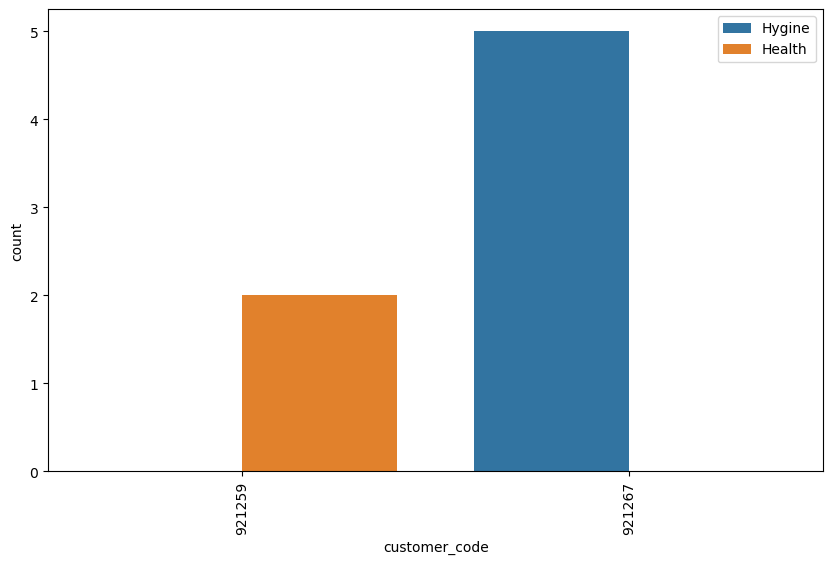

In [27]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='customer_code',hue='business_unit')
plt.xticks(rotation=90)
plt.legend()
plt.show()

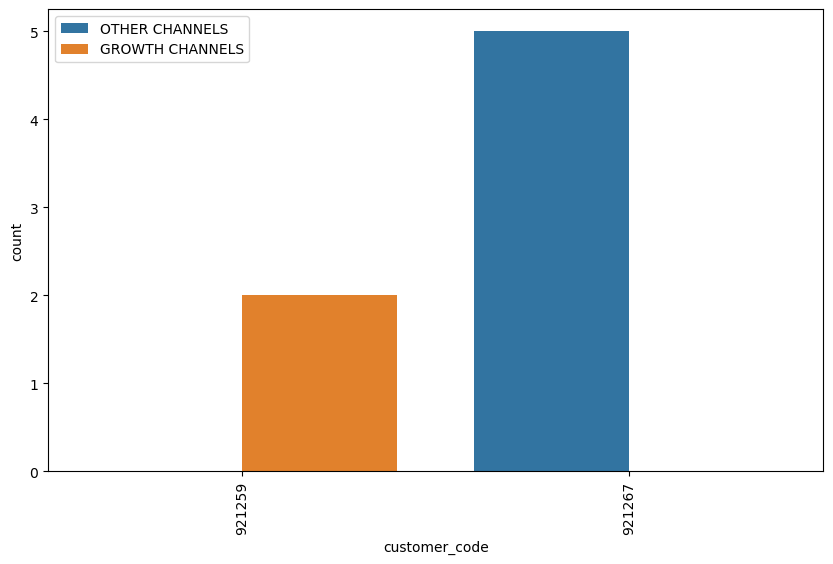

In [28]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='customer_code',hue='Supply_Level_1')
plt.xticks(rotation=90)
plt.legend()
plt.show()

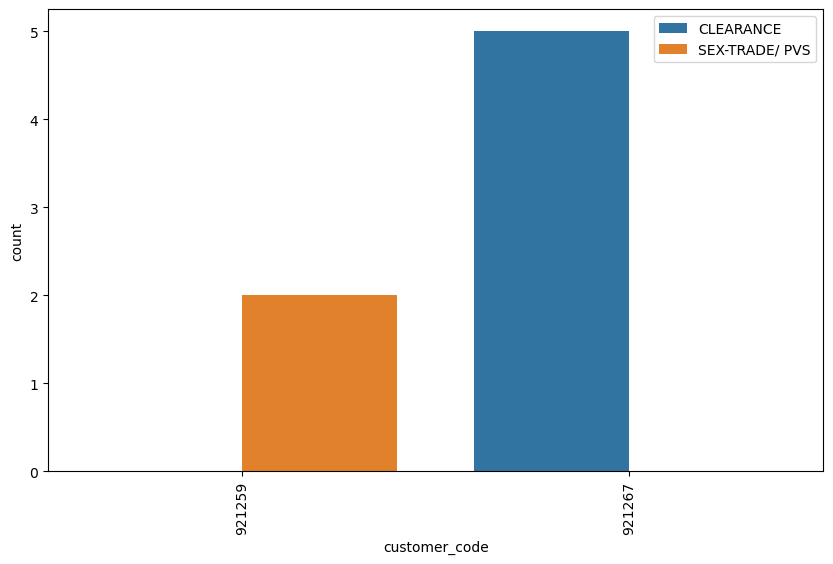

In [29]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='customer_code',hue='Supply_Level_2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

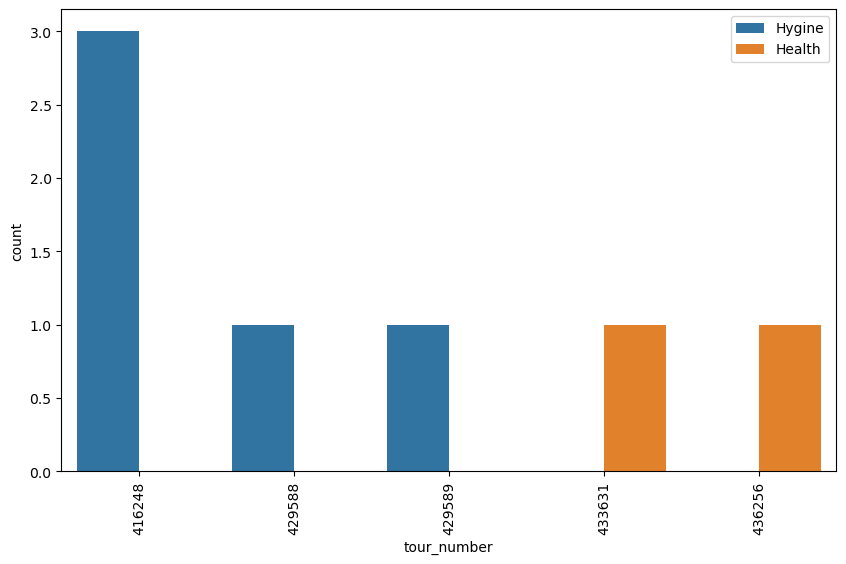

In [30]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='tour_number',hue='business_unit')
plt.xticks(rotation=90)
plt.legend()
plt.show()

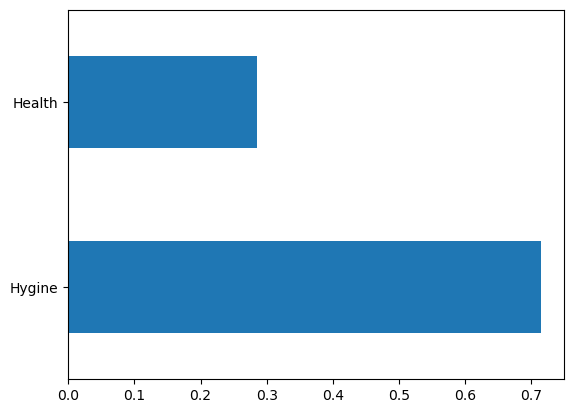

In [34]:
#plot the bar graph of percentage business_unit categories
df.business_unit.value_counts(normalize= True).plot.barh()
plt.show()

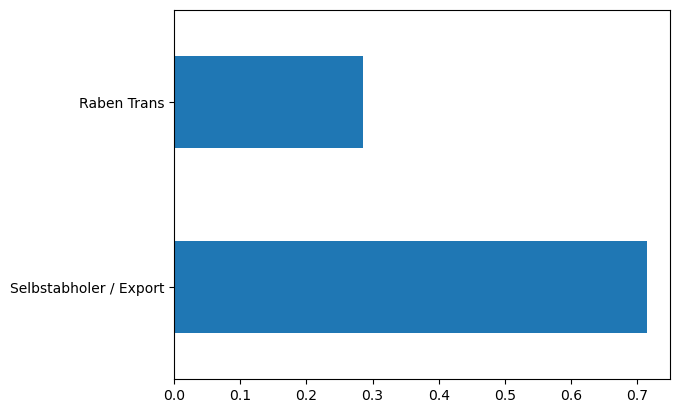

In [35]:
#plot the bar graph of percentage transportation_comp_name categories
df.transportation_comp_name.value_counts(normalize= True).plot.barh()
plt.show()

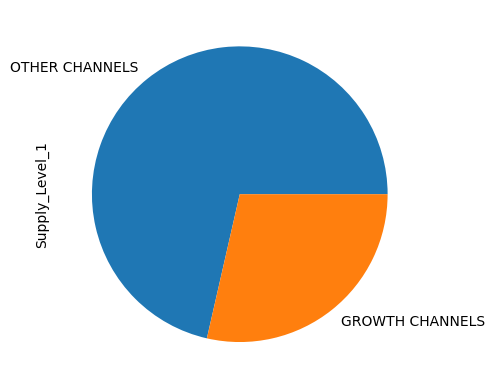

In [36]:
#plot the pie chart of esupply level 1 categories
# UNIVARIATE ANALYSIS
df.Supply_Level_1.value_counts(normalize= True).plot.pie()
plt.show()

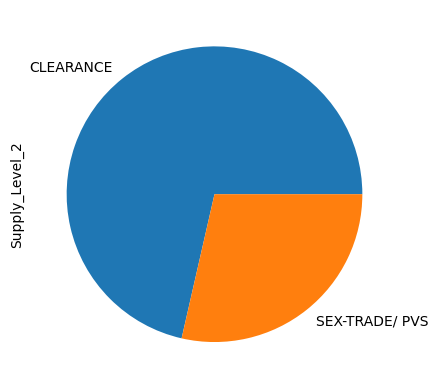

In [37]:
#plot the pie chart of education categories
df.Supply_Level_2.value_counts(normalize= True).plot.pie()
plt.show()

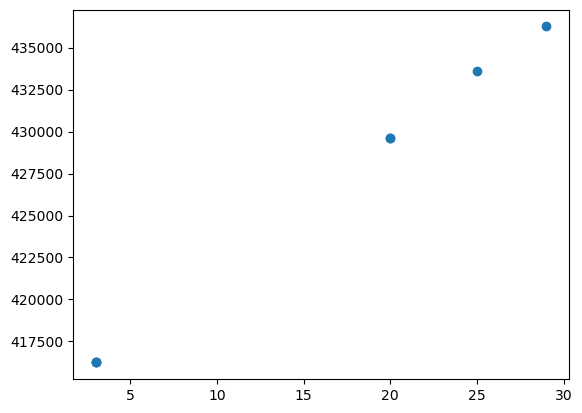

In [39]:
#plot the scatter plot of week n.o and tour number variable in inp1
plt.scatter(df.Week_No, df.tour_number)
plt.show()

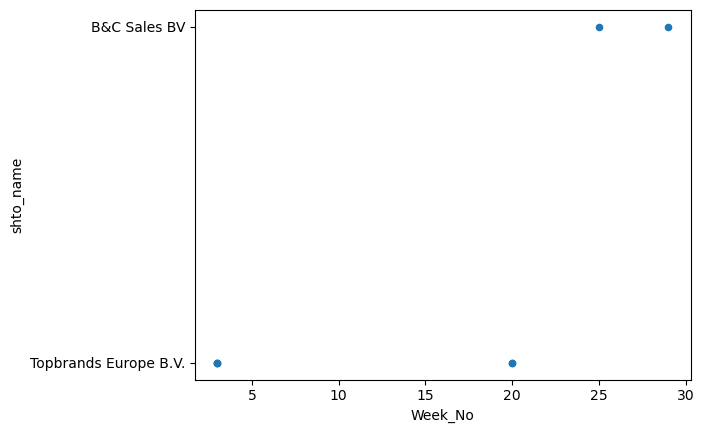

In [40]:
#plot the scatter plot of week number and shipping to variable in df
df.plot.scatter(x='Week_No', y='shto_name')
plt.show()



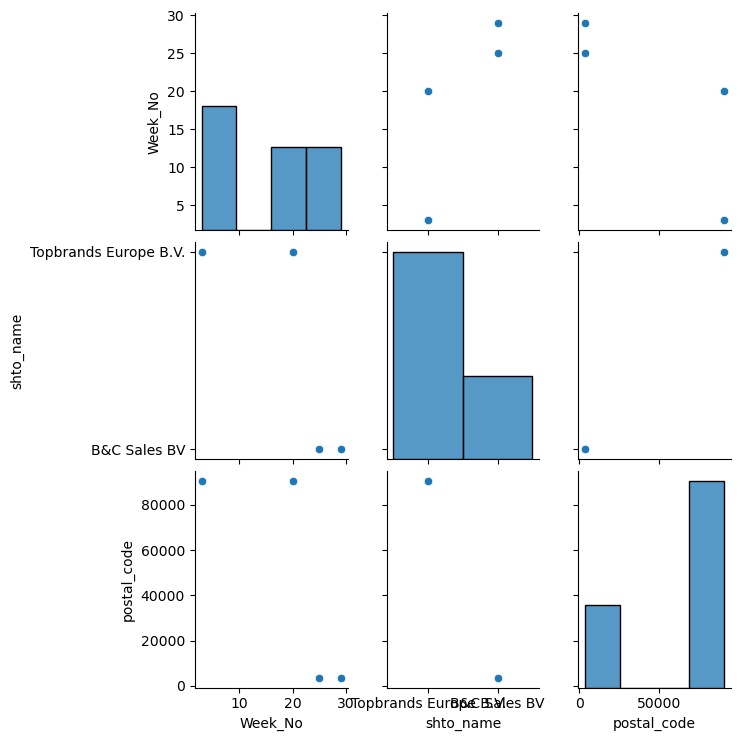

In [41]:
#plot the pair plot of weeek number, shipping to name and postal code in the dataframe.
sns.pairplot(data=df, vars=["Week_No","shto_name", "postal_code"])
plt.show()



In [44]:
# MULTIVARIATE ANALYSIS
res=pd.pivot_table(data=df, index="Week_No", columns="tour_number", values="customer_code")
res

tour_number,416248,429588,429589,433631,436256
Week_No,,,,,
3,921267.0,NaN,NaN,NaN,NaN
20,NaN,921267.0,921267.0,NaN,NaN
25,NaN,NaN,NaN,921259.0,NaN
29,NaN,NaN,NaN,NaN,921259.0


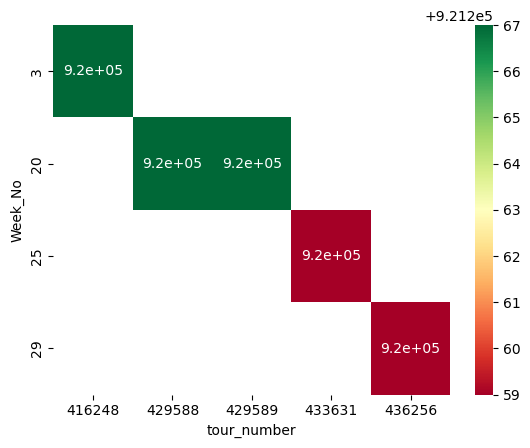

In [45]:
#create heat map of the attributes
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

In [48]:
res1=pd.pivot_table(data=df, index="postal_code", columns="tour_number", values="Week_No")
res1

tour_number,416248,429588,429589,433631,436256
postal_code,,,,,
3627,NaN,NaN,NaN,25.0,29.0
90765,3.0,20.0,20.0,NaN,NaN


In [ ]:
 sns.heatmap(res1, annot= True, cmap="RdYlGn", center= 0.2308)
plt.show()

In [ ]:
# Summary


1. The number of customers opting for Hygine business unit are more than the Health Business unit.
2. For supply level 1 and 2 other channels takes advantage
3. The tour numbers go more for Hygine business unit
4. The transportation company  Selbstabholer / Export does more business than Raben Trans 
5. The shipping to companies B&C Sales BV opt for business at larger weeks than Europe B.V opt for
6. The company should focus on bringing more business in to the Hygine sector than the Health sector



---------------------------------THE END----------------------------------------------
